In [9]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image, display, clear_output

path1= "tablet.jpg"
img1=cv2.imread(path1,cv2.IMREAD_GRAYSCALE)

path2= "tablet2.jpg"
img2=cv2.imread(path2,cv2.IMREAD_GRAYSCALE)

path3= "tablet3.jpg"
img3=cv2.imread(path3,cv2.IMREAD_GRAYSCALE)

path4= "tablet4.jpg"
img4=cv2.imread(path4,cv2.IMREAD_GRAYSCALE)

path5= "tablet5.jpg"
img5=cv2.imread(path5,cv2.IMREAD_GRAYSCALE)

path6= "tablet6.jpg"
img6=cv2.imread(path6,cv2.IMREAD_GRAYSCALE)

path7= "tablet7.jpg"
img7=cv2.imread(path7,cv2.IMREAD_GRAYSCALE)


imgs2search=[img2,img3,img4,img5,img6,img7]

In [10]:

# Display image for ROI selection
roi = cv2.selectROI("Select ROI", cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR))
cv2.destroyAllWindows()

# Extract ROI coordinates
x, y, w, h = roi  # Top-left corner (x, y) and width, height
print(f"ROI coordinates: x={x}, y={y}, w={w}, h={h}")

ROI coordinates: x=34, y=9, w=268, h=183


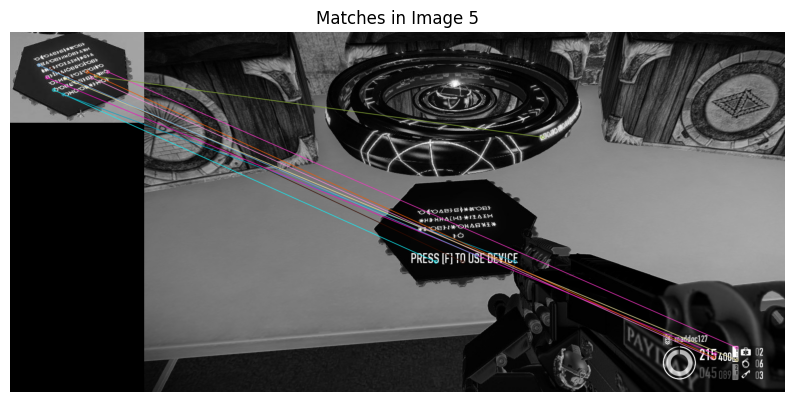

In [12]:
# Define ROI
#x, y, w, h = 31, 12, 253, 179  # Example ROI coordinates
roi = img1[y:y+h, x:x+w]

# Initialize feature detector
orb = cv2.ORB_create(nfeatures=100)  # Increase features if needed

# Detect and compute features in the ROI
kp1, des1 = orb.detectAndCompute(roi, None)

# Ensure descriptors exist for ROI
if des1 is None:
    print("No features detected in the ROI. Exiting.")
else:
    for i, img in enumerate(imgs2search):
        kp2, des2 = orb.detectAndCompute(img, None)

        # Check if descriptors exist for the current image
        if des2 is None:
            print(f"No features detected in image {i}. Skipping.")
            continue

        # Match features using BFMatcher
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        matches = bf.match(des1, des2)

        # Sort matches by distance
        matches = sorted(matches, key=lambda x: x.distance)

        # Apply a minimum number of matches threshold
        if len(matches) < 10:
            print(f"Few matches ({len(matches)}) found in image {i}. Skipping.")
            continue

        # Draw matches
        result = cv2.drawMatches(roi, kp1, img, kp2, matches[:10], None, flags=2)

        # Display result
        plt.figure(figsize=(10, 5))
        plt.imshow(result)
        plt.title(f"Matches in Image {i}")
        plt.axis('off')  # Hide axes
        plt.show()

        input("Press Enter to continue...")
        clear_output(wait=True)